# Importing packages

In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
#Checking for current directory
import os
os.getcwd()

'/Users/dtendits/pythonproject'

## Importing dataframes from csv, checking info and merging

In [3]:
#Creating dataframe out of csv dataset and setting first column "Rank" as the row index
gaming_data = pd.read_csv("vgsales.csv")

In [4]:
#Identifying amount of entries, columns, memory usage and data types
gaming_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
#Checking for missing values
gaming_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
#Checking the first 5 and last 5 values of the dataframe
gaming_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [7]:
#After noticing several missing values, I have decided to drop the rows with missing values
gaming_data = gaming_data.dropna()

In [8]:
#Importing second dataframe and merging dataframes 
gaming_scores = pd.read_csv("Video_Games_Scores.csv")
merged_gaming_data = pd.merge(gaming_data,gaming_scores,on="Name")

In [9]:
#Checking for header names
print(merged_gaming_data.columns)

Index(['Rank', 'Name', 'Platform_x', 'Year_x', 'Genre_x', 'Publisher_x',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Platform_y', 'Year_y', 'Genre_y', 'Publisher_y', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')


In [10]:
#Cleaning up merged dataframe
merged_gaming_data = merged_gaming_data.rename(columns={"Platform_x": "Platform", "Genre_x": "Genre", "Publisher_x": "Publisher","Year_x": "Year"})
merged_gaming_data = merged_gaming_data.drop(["Platform_y", "Year_y", "Genre_y", "Publisher_y"], axis=1)
merged_gaming_data = merged_gaming_data.dropna()
merged_gaming_data = merged_gaming_data.drop_duplicates(subset=["Name"])
merged_gaming_data = merged_gaming_data.reset_index(drop=True)
merged_gaming_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8,322.0
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8,192.0
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,65.0,8.5,431.0
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,41.0,6.6,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,16525,Karnaaj Rally,GBA,2003.0,Racing,Jaleco,0.01,0.00,0.00,0.00,0.01,81.0,9.0,9.5,4.0
4375,16535,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0
4376,16543,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.00,0.01,63.0,6.0,5.8,8.0
4377,16552,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0


## Analysis

In [11]:
#Outputting top 25 grossing
merged_gaming_data[0:25]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8,322.0
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8,192.0
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,65.0,8.5,431.0
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,41.0,6.6,129.0
5,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,87.0,80.0,8.4,594.0
6,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,91.0,64.0,8.6,464.0
7,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,80.0,63.0,7.7,146.0
8,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,80.0,33.0,7.4,52.0
9,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,61.0,45.0,6.3,106.0


In [12]:
#Selecting rows and colum for clearar view and top 25 games and their globals sales
merged_gaming_data.loc[:25, ["Name","Global_Sales"]]

,Name,Global_Sales
0,Wii Sports,82.74
1,Mario Kart Wii,35.82
2,Wii Sports Resort,33.00
3,New Super Mario Bros.,30.01
4,Wii Play,29.02
5,New Super Mario Bros. Wii,28.62
6,Mario Kart DS,23.42
7,Wii Fit,22.72
8,Wii Fit Plus,22.00
9,Kinect Adventures!,21.82


In [13]:
#Identifying all unique gaming platforms within the dataframe
merged_gaming_data["Platform"].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS', 'SNES', 'PS4',
       'XB', 'PC', 'PSP', 'GC', 'WiiU', 'GBA', 'GEN', 'XOne', 'NES',
       'N64', 'PSV', 'DC', '2600', 'SAT'], dtype=object)

In [14]:
#Idenfifying all unique gaming genres within the dataframe
merged_gaming_data["Genre"].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [15]:
#Idenfifying all unique years within the dataframe
arr_years = merged_gaming_data["Year"].unique()
arr_years

array([2006., 2008., 2009., 2005., 2007., 2010., 2013., 2004., 2002.,
       2001., 2011., 2012., 1997., 1999., 1994., 2015., 2014., 2003.,
       1998., 1996., 2000., 2016., 1991., 1989., 1995., 1992., 1980.,
       1985., 1982.])

In [16]:
#Sorting years in ascending fashion
arr_years.sort()
arr_years

array([1980., 1982., 1985., 1989., 1991., 1992., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016.])

In [17]:
#Turned Year column to int and filtered an output games between year 2000 and 2016
merged_gaming_data["Year"] = merged_gaming_data["Year"].astype(int)
filter_years = merged_gaming_data[(merged_gaming_data["Year"] >= 2000) & (merged_gaming_data["Year"] <= 2016)]
filter_years

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8,322.0
1,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0
2,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8,192.0
3,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,65.0,8.5,431.0
4,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,41.0,6.6,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,16525,Karnaaj Rally,GBA,2003,Racing,Jaleco,0.01,0.00,0.00,0.00,0.01,81.0,9.0,9.5,4.0
4375,16535,STORM: Frontline Nation,PC,2011,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0
4376,16543,15 Days,PC,2009,Adventure,DTP Entertainment,0.00,0.01,0.00,0.00,0.01,63.0,6.0,5.8,8.0
4377,16552,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0


### Genre

In [38]:
#Finding mean critics score value per genre
mean_critic_score = merged_gaming_data.groupby("Genre")["Critic_Score"].mean().sort_values(ascending=False)
print(mean_critic_score)

Genre
Strategy        72.842105
Role-Playing    72.516351
Sports          71.727451
Puzzle          71.000000
Platform        70.858736
Simulation      70.283262
Shooter         69.831663
Racing          69.575843
Fighting        68.868726
Action          67.618605
Adventure       66.693467
Misc            65.974910
Name: Critic_Score, dtype: float64


In [42]:
#Created a list and found mean critic across all games
mean_user_score = merged_gaming_data["Critic_Score"].tolist()
mean_score = np.mean(mean_critic_score)
print(mean_score)

69.81592662487377


### Publishers

In [18]:
#Idenfifying all unique publishers within the dataframe and sorting them by alphabet
unique_publishers = merged_gaming_data["Publisher"].unique()
unique_publishers = np.sort(unique_publishers)
print(unique_publishers)

['10TACLE Studios' '1C Company' '2D Boy' '3DO' '505 Games' '5pb'
 'AQ Interactive' 'ASCII Entertainment' 'Acclaim Entertainment' 'Acquire'
 'Activision' 'Activision Blizzard' 'Activision Value'
 'Agatsuma Entertainment' 'Agetec' 'Aksys Games' 'Alternative Software'
 'Aqua Plus' 'Arc System Works' 'Arena Entertainment'
 'Ascaron Entertainment GmbH' 'Aspyr' 'Astragon' 'Atari' 'Atlus'
 'Avalon Interactive' 'Avanquest' 'BAM! Entertainment' 'Banpresto'
 'Bethesda Softworks' 'Bigben Interactive' 'Black Bean Games'
 'Black Label Games' 'Blue Byte' 'Bohemia Interactive'
 'Brash Entertainment' 'CCP' 'CDV Software Entertainment' 'Capcom' 'Cave'
 'City Interactive' 'Cloud Imperium Games Corporation' 'Codemasters'
 'Codemasters Online' 'Compile Heart' 'Conspiracy Entertainment'
 'Crave Entertainment' 'Crimson Cow' 'D3Publisher' 'DHM Interactive'
 'DSI Games' 'DTP Entertainment' 'Daedalic' 'Daedalic Entertainment'
 'Deep Silver' 'Destination Software, Inc' 'Destineer' 'Devolver Digital'
 'Disney In

In [19]:
#Counting the historical amount of games per publisher
game_count_by_publisher = merged_gaming_data["Publisher"].value_counts()
print(game_count_by_publisher)

Electronic Arts                394
Nintendo                       288
Sony Computer Entertainment    280
Ubisoft                        273
Activision                     210
                              ... 
Havas Interactive                1
Bigben Interactive               1
SCS Software                     1
Yacht Club Games                 1
NewKidCo                         1
Name: Publisher, Length: 265, dtype: int64


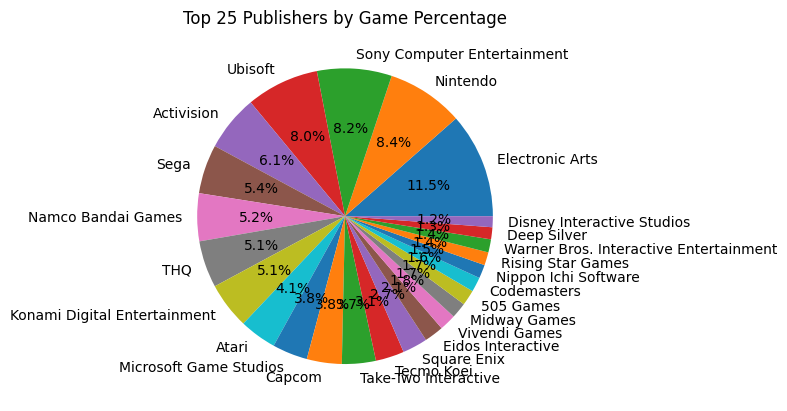

In [20]:
#Defining a valiable to store 25 top publishers and outputting on a pie chart the % of all games per publisher
publisher_percent = merged_gaming_data["Publisher"].value_counts(normalize=True).sort_values(ascending=False)
top_25_publishers = publisher_percent.head(25)
plt.pie(top_25_publishers, labels=top_25_publishers.index, autopct="%1.1f%%")
plt.title("Top 25 Publishers by Game Percentage")
plt.show()

### Platforms

In [21]:
#Identifying top 25 platforms game count
top_platforms = merged_gaming_data.Platform.value_counts().head(25)
pd.DataFrame(top_platforms)

,Platform
PS2,1075
PS3,447
X360,402
DS,390
Wii,366
PC,306
PSP,258
XB,201
GBA,185
PS4,171


In [22]:
#Assigning console type to each console through dictionary
platform_type = {
 "Wii" : "console", "NES" : "console", "GB" : "handheld", "DS" : "handheld", "X360" : "console",
 "PS3" : "console", "PS2" : "console", "SNES" : "console", "GBA" : "handheld", "3DS" : "handheld",
 "PS4" : "console", "N64" : "console", "PS" : "console", "XB" : "console", "PC": "PC", "2600": "console",
 "PSP" : "handheld", "XOne" : "console", "GC" : "console", "WiiU" : "console", "GEN": "console",
 "DC": "console", "PSV": "handheld", "SAT": "console", "SCD" : "console", "WS" : "handheld",
 "NG" : "console", "TG16": "console", "3DO": "console", "GG": "handheld", "PCFX": "console"}

In [23]:
#Created new column Platform_Type and mapped it to dataframe
merged_gaming_data["Platform_Type"] = merged_gaming_data["Platform"].map(lambda x: platform_type[x])

In [24]:
#Assigning new position to Platform_Type column to be near Platform column
columns = merged_gaming_data.columns.tolist()
platform_type_old_position = columns.index("Platform_Type")
platform_type_new_position = 3
columns.pop(platform_type_old_position)
columns.insert(platform_type_new_position, "Platform_Type")
merged_gaming_data = merged_gaming_data.reindex(columns=columns)

In [25]:
#Counting overall games per platform
count_of_platform_games = merged_gaming_data["Platform_Type"].value_counts()
count_of_platform_games

console     3032
handheld    1041
PC           306
Name: Platform_Type, dtype: int64

<BarContainer object of 3 artists>

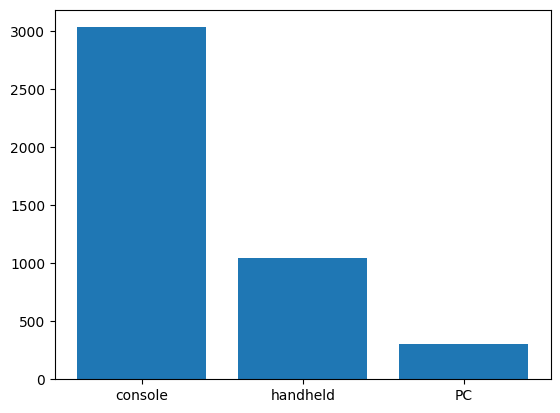

In [26]:
#Showing games per platform on a graph
plt.bar(count_of_platform_games.index, count_of_platform_games)

<Axes: xlabel='Year', ylabel='count'>

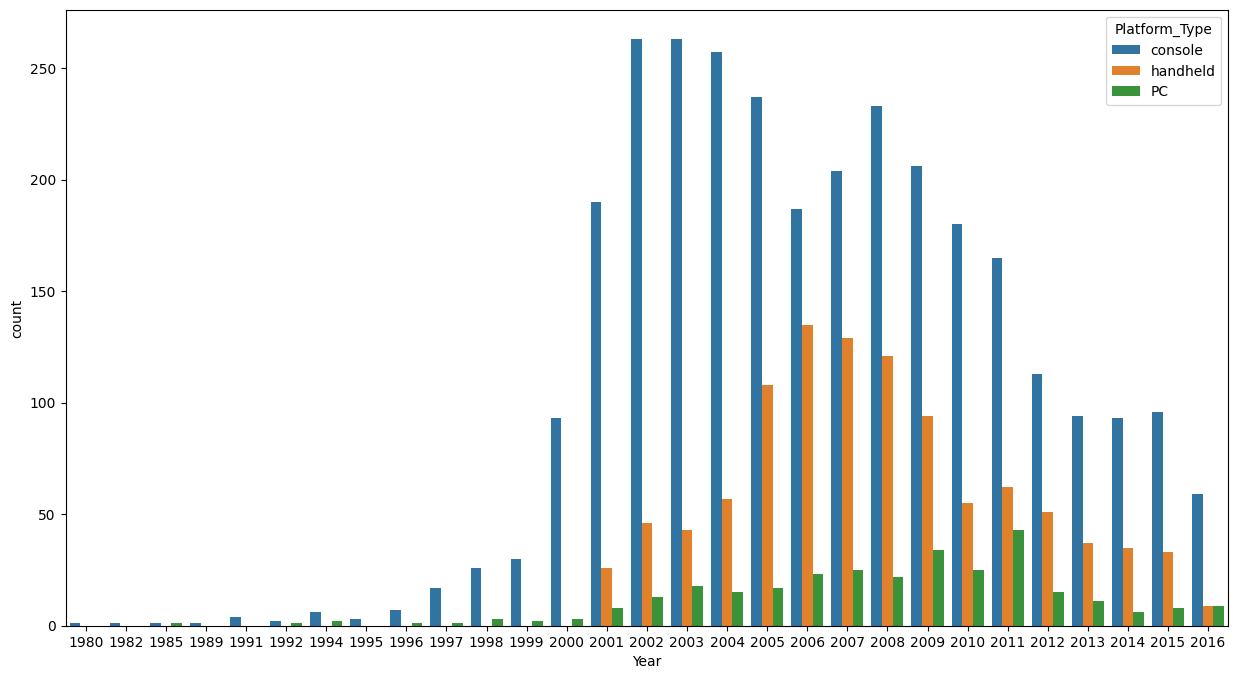

In [27]:
#Created a count plot to see platform type leader of sales in millions over the years
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=merged_gaming_data, x="Year", hue="Platform_Type")

### Genres

In [28]:
#Identifying top 25 genres game count
top_genres = merged_gaming_data.Genre.value_counts().head(25)
pd.DataFrame(top_genres)

,Genre
Action,860
Role-Playing,581
Sports,510
Shooter,499
Racing,356
Misc,279
Platform,269
Fighting,259
Simulation,233
Strategy,228


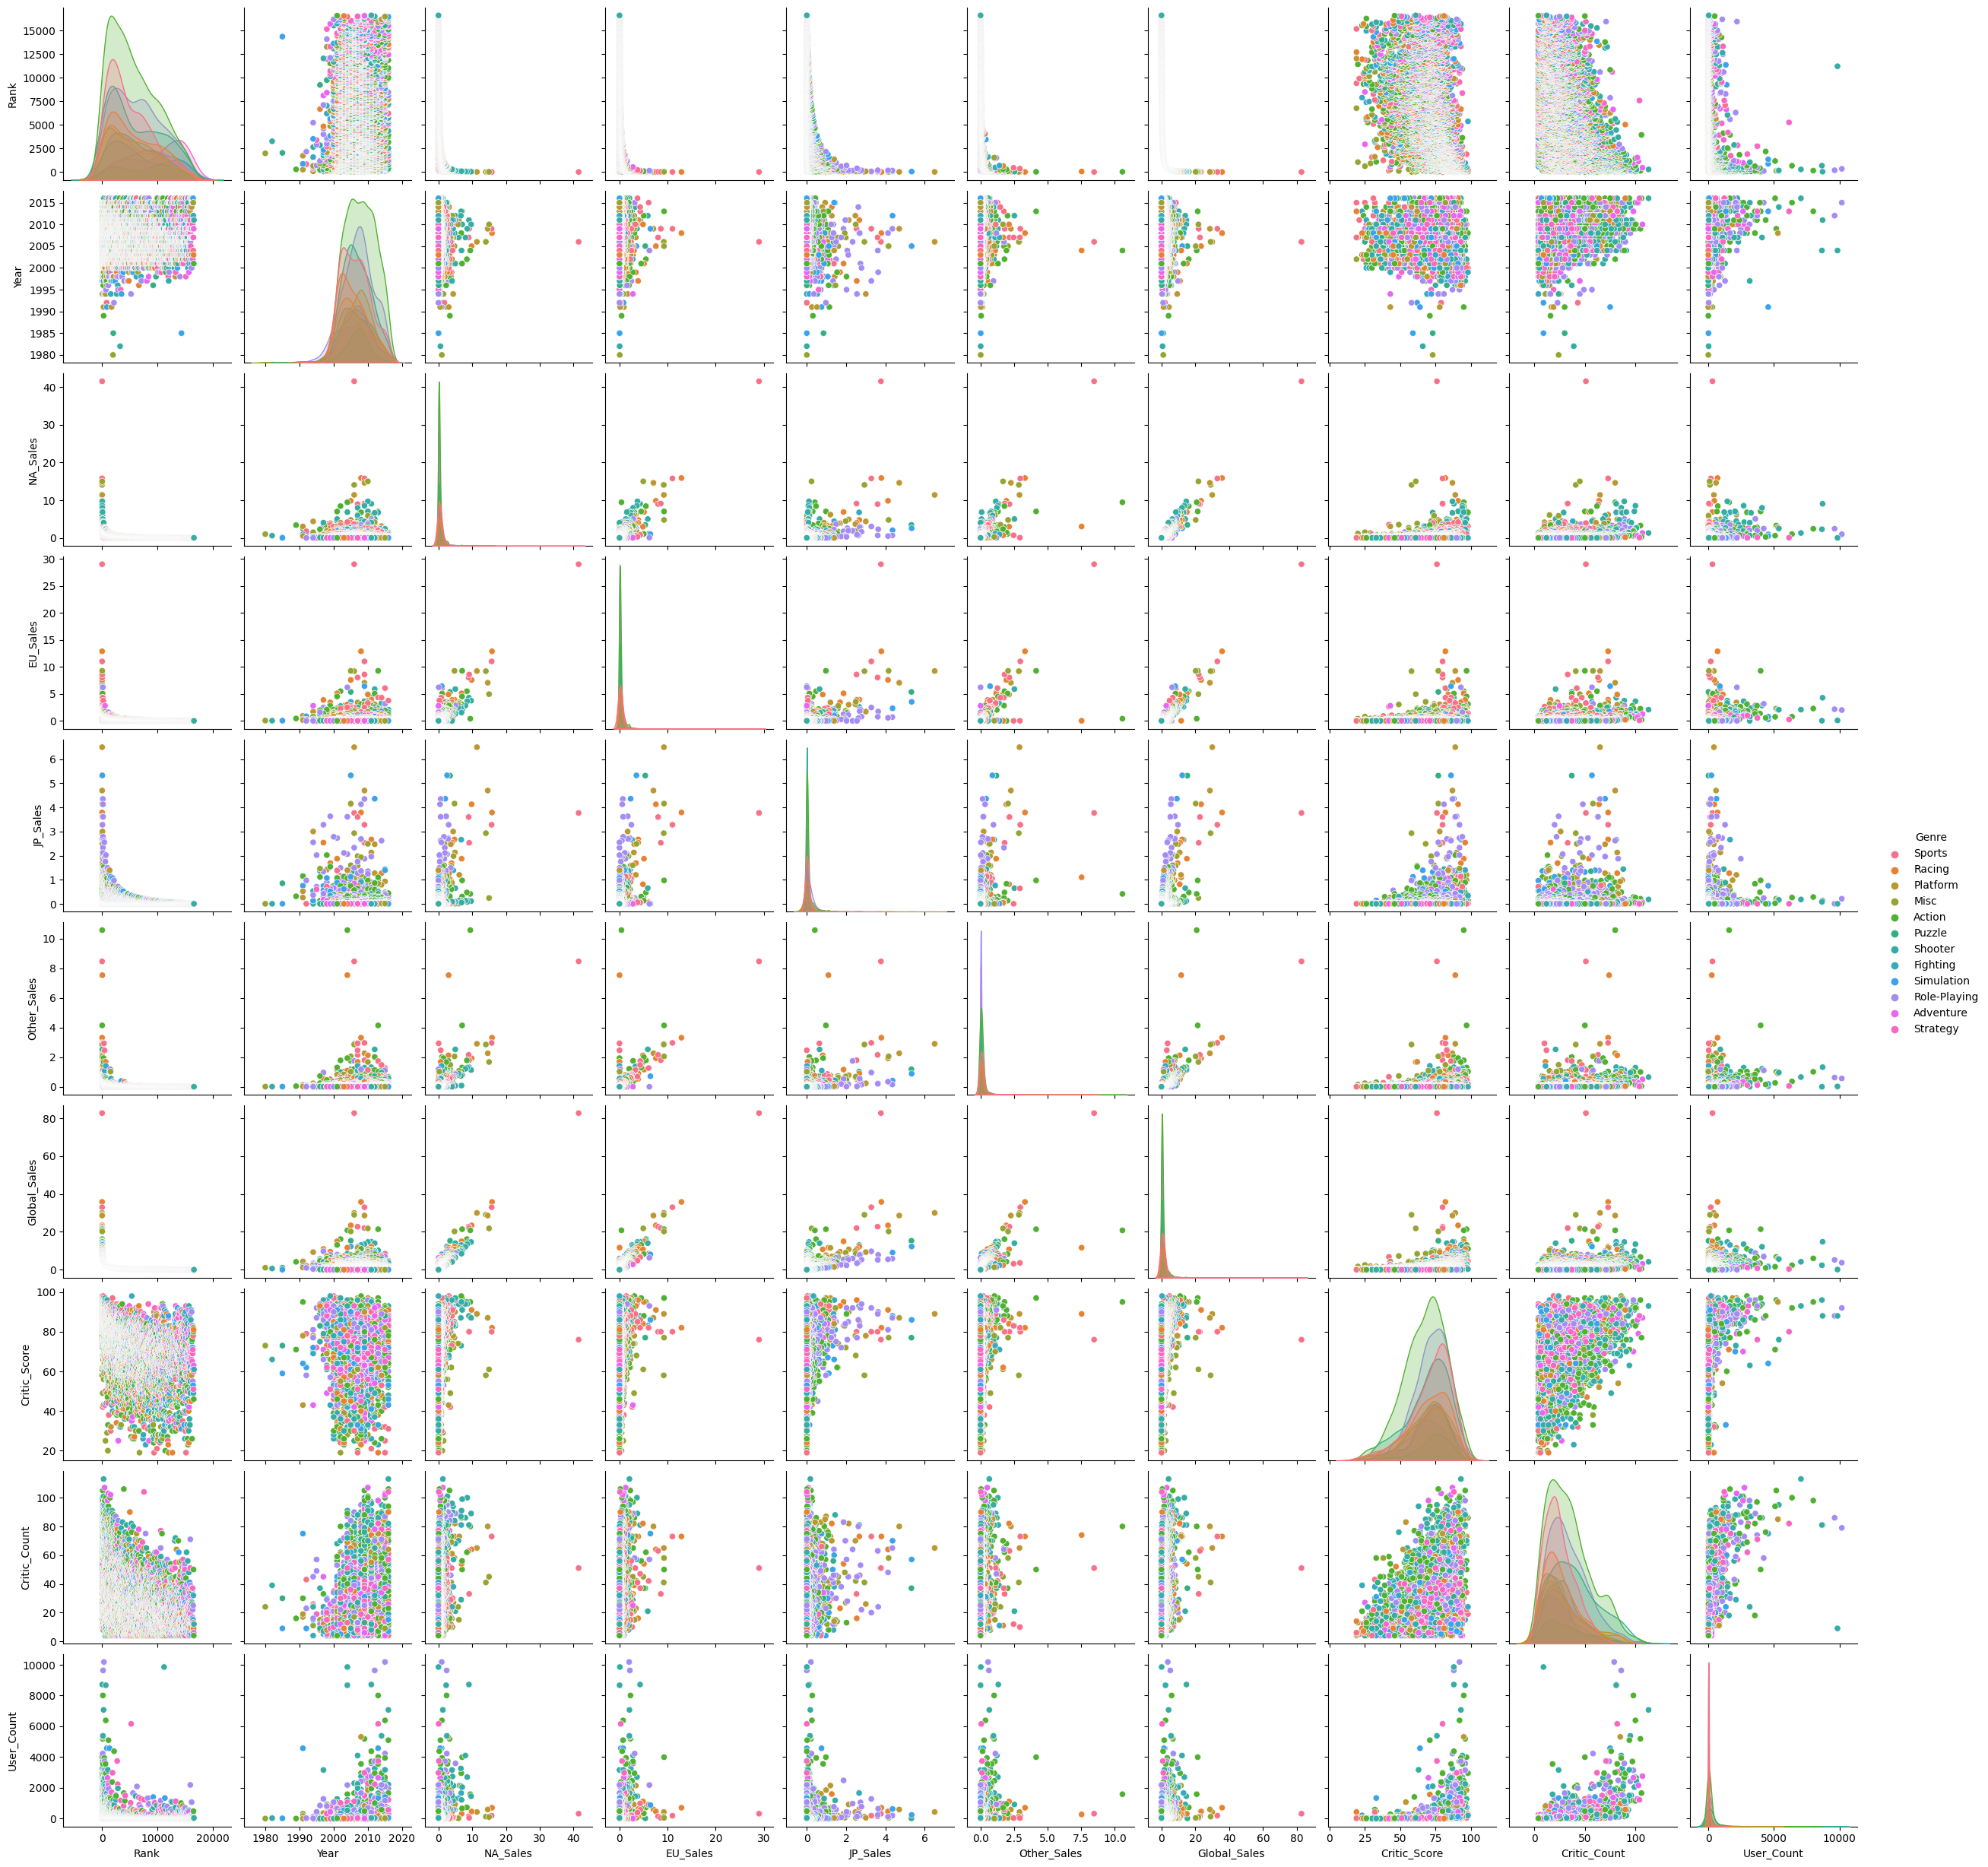

In [29]:
#Created a pairplot to visualise game genres against other variables in the dataset
sns.pairplot(merged_gaming_data, hue="Genre")

### Publishers

In [30]:
#Identifying top 25 publishers game count and output as dataframe
top_publishers = merged_gaming_data[["Publisher", "Rank"]].groupby("Publisher").count().sort_values("Rank", ascending=False).head(25)
pd.DataFrame(top_publishers)

,Rank
Publisher,
Electronic Arts,394
Nintendo,288
Sony Computer Entertainment,280
Ubisoft,273
Activision,210
Sega,184
Namco Bandai Games,179
THQ,176
Konami Digital Entertainment,174


<Axes: title={'center': 'Top 25 publisher games total'}, xlabel='Publisher'>

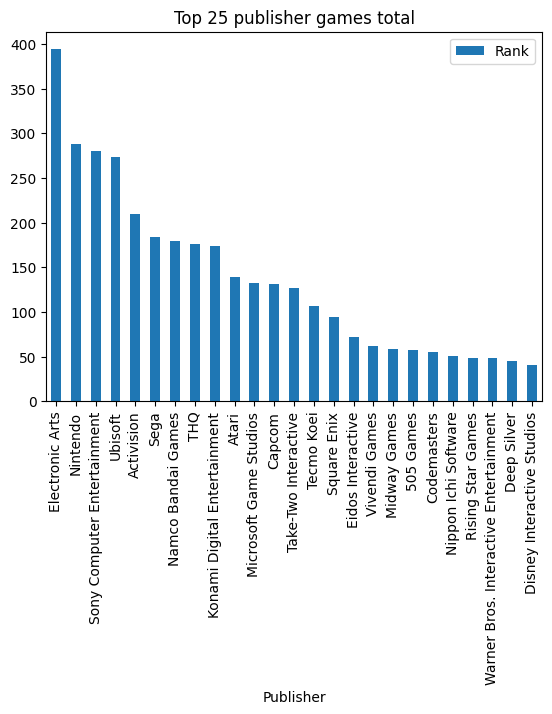

In [31]:
#Creating plot bar to represent top 25 publishers in descending manner
top_publishers.plot.bar(title="Top 25 publisher games total")

In [32]:
#Defining a custom function using boolean indexing to collect rows with publisher value
def get_publisher_sales_EU(gaming_data, publisher):
    return gaming_data[gaming_data["Publisher"] == publisher]["EU_Sales"].sum()

In [33]:
#Listing all unique publishers in Publisher column
eu_publishers = gaming_data["Publisher"].unique()

In [ ]:
#Creating dictionary to store sales of each publisher in EU region
total_eu_sales = {}

In [34]:
#Iterating through list of eu_publishers and getting total sales for each publisher
for publisher in eu_publishers:
    total_eu_sales[publisher] = get_publisher_sales_EU(gaming_data, publisher)

In [35]:
#Creating dataset out of dictionary and filtering data
eu_df = pd.DataFrame.from_dict(total_eu_sales, orient="index", columns=["Total EU Sales"])
eu_df = eu_df.sort_values(by="Total EU Sales", ascending=False)
print(eu_df.head(50))

                                        Total EU Sales
Nintendo                                        418.30
Electronic Arts                                 367.38
Activision                                      213.72
Sony Computer Entertainment                     187.55
Ubisoft                                         163.03
Take-Two Interactive                            117.95
THQ                                              94.60
Sega                                             81.41
Konami Digital Entertainment                     68.62
Microsoft Game Studios                           68.61
Warner Bros. Interactive Entertainment           48.83
Namco Bandai Games                               42.61
Capcom                                           39.16
Eidos Interactive                                34.85
Disney Interactive Studios                       34.36
Square Enix                                      32.57
Bethesda Softworks                               30.48
Codemaster